In [2]:
import json
import pandas as pd
import datetime

import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 100)

## Public matches (general info)

In [256]:
with open('../data/public_matches_p3.json') as f:
    public_matches = json.load(f)

In [249]:
set([type(x) for x in public_matches])

{dict, str}

Skip errors in the data

In [258]:
# public_matches = [x for x in public_matches \
#                   if type(x) == dict]

# with open('../data/public_matches_p3.json', 'w') as f:
#     json.dump(public_matches, f)

In [259]:
public_matches_df = pd.DataFrame(public_matches)
public_matches_df['start_time'] = pd.to_datetime(
    public_matches_df.start_time,unit='s')

In [260]:
public_matches_df.shape

(67200, 14)

In [261]:
public_matches_df.head()

,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_team,dire_team
0,6805855803,5698885793,False,2022-10-14 21:36:48,2909,NaN,NaN,0,22,21,2,182,"46,109,105,34,103","11,67,31,71,85"
1,6805855802,5698879264,False,2022-10-14 21:36:48,2400,2414.0,4.0,7,22,54,6,186,"9,28,62,70,26","8,123,16,31,84"
2,6805855801,5698878881,False,2022-10-14 21:36:38,2422,4083.0,1.0,7,22,51,5,185,"96,11,46,79,123","62,105,128,94,74"
3,6805855800,5698881554,True,2022-10-14 21:36:14,2523,NaN,NaN,7,22,44,3,153,"68,39,28,20,6","40,54,123,87,2"
4,6805855716,5698889983,False,2022-10-14 21:36:44,3261,4062.0,5.0,7,22,71,8,188,"120,112,19,85,1","86,29,8,40,34"


In [263]:
public_matches_df.start_time

0       2022-10-14 21:36:48
1       2022-10-14 21:36:48
2       2022-10-14 21:36:38
3       2022-10-14 21:36:14
4       2022-10-14 21:36:44
                ...        
67195   2022-10-14 08:16:59
67196   2022-10-14 08:17:00
67197   2022-10-14 08:16:59
67198   2022-10-14 08:16:50
67199   2022-10-14 08:16:50
Name: start_time, Length: 67200, dtype: datetime64[ns]

<AxesSubplot: >

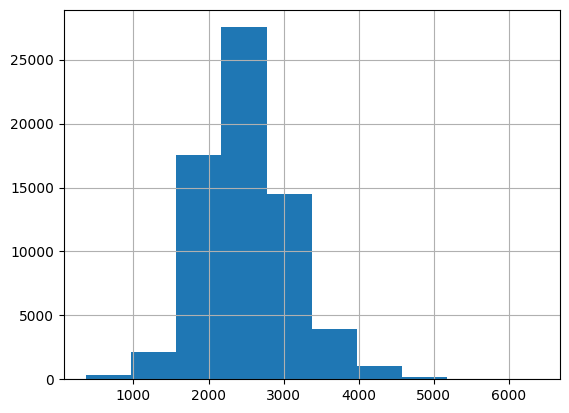

In [264]:
public_matches_df.duration.hist()

In [265]:
public_matches_df.duration.quantile(0.01) / 60

20.083166666666667

<AxesSubplot: >

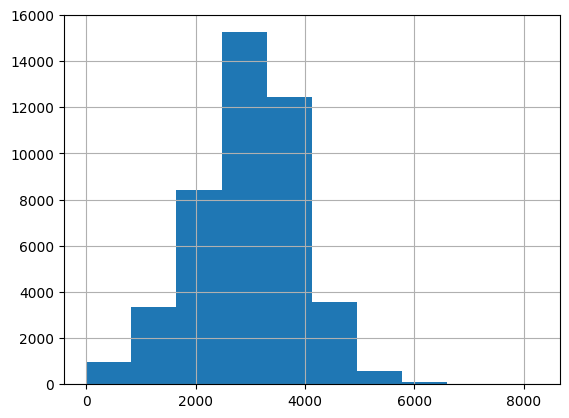

In [266]:
public_matches_df.avg_mmr.hist()

In [267]:
# https://github.com/odota/dotaconstants/blob/master/json/lobby_type.json
public_matches_df.lobby_type.value_counts()

7    51276
0    15903
1       21
Name: lobby_type, dtype: int64

In [268]:
# https://github.com/odota/dotaconstants/blob/master/json/game_mode.json
public_matches_df.game_mode.value_counts()

22    61422
4      3219
3      2358
2       125
5        71
16        5
Name: game_mode, dtype: int64

<AxesSubplot: >

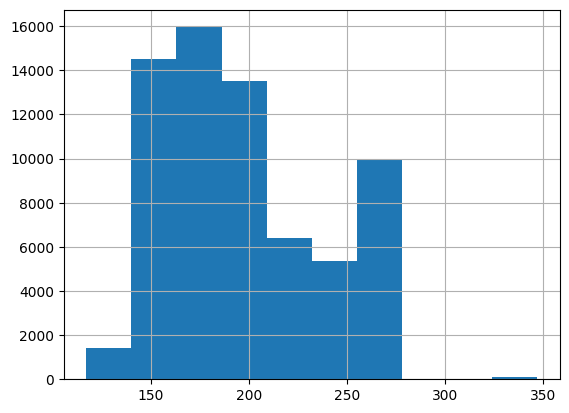

In [269]:
public_matches_df.cluster.hist()

## Public matches details

In [202]:
100_000 * 0.01 / 100

10.0

In [358]:
with open('../data/matches_details_p2.json') as f:
    matches_details = json.load(f)

### Fix JSON file (in case of corruption during write)

In [271]:
with open('../data/matches_details_p2.json') as f:
    matches_details_lines = f.readlines()

check_n_last = 30_000

In [287]:
# matches_details_lines[0][-check_n_last:]

In [335]:
index_f = matches_details_lines[0][-check_n_last:].index(
    '{"match_id": 6806986204, "barracks_status_dire": 0')

matches_details_lines_fix = (matches_details_lines[0]\
 [:-(check_n_last - index_f + 2)] + ']')

In [350]:
matches_details_lines_fix[-100:]

'ch": 51, "region": 8, "replay_url": "http://replay183.valve.net/570/6806461912_1614763597.dem.bz2"}]'

In [354]:
matches_details_lines_fix = json.loads(
    matches_details_lines_fix)

with open('../data/matches_details_p2.json', 'w') as f:
    json.dump(matches_details_lines_fix, f)

End of file fix

---

In [359]:
matches_details_df = pd.DataFrame(matches_details)

In [360]:
matches_details_df.shape

(12442, 48)

In [361]:
matches_details_df.tail()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,league,radiant_team,dire_team,comeback,stomp
12437,6806986202,3,63,None,183,None,28,NaN,None,2363,1,77,22,10,0,0,5699891576,0,None,"[{'is_pick': True, 'hero_id': 44, 'team': 0, '...",0,None,35,NaN,True,None,None,1665848186,None,6,1958,NaN,1.765668e+09,0.0,0.0,"[{'match_id': 6806986202, 'player_slot': 0, 'a...",51,8,http://replay183.valve.net/570/6806986202_1765...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12438,6806986201,59,3,None,227,None,54,NaN,None,3241,1,8,22,10,0,7,5699915811,0,None,"[{'is_pick': True, 'hero_id': 10, 'team': 0, '...",0,None,48,NaN,True,None,None,1665848193,None,260,1540,NaN,1.077621e+09,0.0,0.0,"[{'match_id': 6806986201, 'player_slot': 0, 'a...",51,20,http://replay227.valve.net/570/6806986201_1077...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12439,6806986203,63,48,None,154,None,33,NaN,None,1308,1,50,22,10,0,7,5699861730,0,None,"[{'is_pick': True, 'hero_id': 104, 'team': 0, ...",0,None,8,NaN,False,None,None,1665848199,None,2047,0,NaN,9.762794e+08,0.0,0.0,"[{'match_id': 6806986203, 'player_slot': 0, 'a...",51,5,http://replay154.valve.net/570/6806986203_9762...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12440,6806986205,63,0,None,144,None,56,NaN,None,3199,1,166,22,10,0,0,5699913993,0,None,"[{'is_pick': True, 'hero_id': 81, 'team': 0, '...",0,None,44,NaN,False,None,None,1665848204,None,2038,0,NaN,1.863567e+09,0.0,0.0,"[{'match_id': 6806986205, 'player_slot': 0, 'a...",51,19,http://replay144.valve.net/570/6806986205_1863...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12441,6806461912,51,0,None,183,None,71,NaN,None,3658,1,78,22,10,0,0,5699448735,0,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",0,None,52,NaN,False,None,None,1665828437,None,1796,0,NaN,1.614764e+09,0.0,0.0,"[{'match_id': 6806461912, 'player_slot': 0, 'a...",51,8,http://replay183.valve.net/570/6806461912_1614...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [362]:
matches_details_df = matches_details_df[
    ~matches_details_df.match_id.isna()]

In [363]:
matches_details_df.shape

(12442, 48)

<AxesSubplot: >

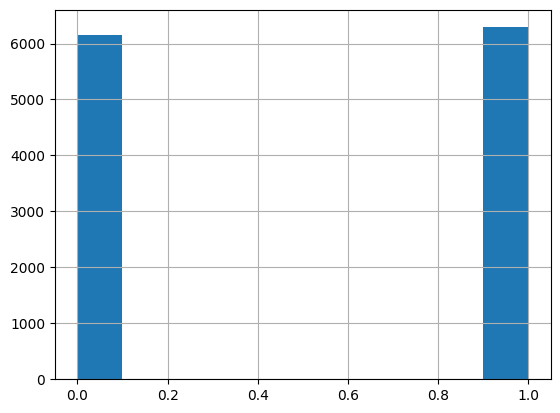

In [364]:
matches_details_df[~matches_details_df.radiant_win.isna()]\
    .radiant_win.astype(int).hist()

In [365]:
matches_with_chat = matches_details_df[
    ~matches_details_df.chat.isna()]

In [366]:
matches_with_chat.shape

(47, 48)

In [367]:
matches_with_chat['chat_count'] = \
    matches_with_chat.chat.apply(
    lambda item: sum([x['type'] == 'chat' for x in item]))

/var/folders/_1/51tlm4vx6rj6_81hp_5k3rg00000gn/T/ipykernel_43577/1222791709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_chat['chat_count'] = \


<AxesSubplot: >

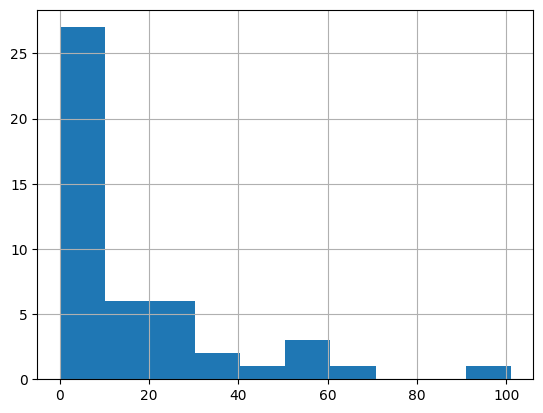

In [368]:
matches_with_chat.chat_count.hist()

In [369]:
(matches_with_chat.chat_count > 1).sum()

42

In [370]:
17 / 4000 * 100_000

425.00000000000006

So, 200k public matches are needed

In [458]:
i = 29
one_chat = matches_with_chat.chat.values[i]

In [459]:
pd.Series.value_counts([c['type'] for c in one_chat])

chatwheel    39
chat         22
dtype: int64

In [460]:
[f"{c['key']} : {c['time'] // 60}min" \
 for c in one_chat if c['type'] == 'chat']

['who are you boosting today tinker? : -1min',
 'gg : 9min',
 'report stalker : 9min',
 '3 bashes 4 hits : 20min',
 'good stats : 20min',
 'end  : 27min',
 'wp : 27min',
 'end : 28min',
 'xD : 29min',
 'report phoenix and shmana and luna grieffing : 29min',
 'phoenix good player : 29min',
 'shaman too : 29min',
 'but you : 29min',
 '3 null : 29min',
 ')) : 29min',
 'if my team is not feeded yyou i just rekt you all time : 30min',
 'gg : 30min',
 'ez mid : 30min',
 'ez : 31min',
 'Axaxaxa : 31min',
 'gg : 31min',
 'gg booster : 31min']

---

First part: from 6808764903 100k; second part: 6807096016 70k; third part: from 6805855815 70k.

In [242]:
sorted(public_matches_df.match_id.values)[:10]

[6805855815,
 6805855817,
 6805855818,
 6805855900,
 6805855902,
 6805855904,
 6805855907,
 6805855917,
 6805855918,
 6805856000]